In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month
import matplotlib.pyplot as plt
import numpy as np

# Inicializar la sesión de Spark
spark = SparkSession.builder.appName("TiendasVentas").getOrCreate()

# Cargar el archivo CSV en un DataFrame de Spark
df = spark.read.csv('/FileStore/tables/tienda_ventas.csv', header=True, inferSchema=True)

# Preprocesamiento de los datos
df = df.withColumn('fecha', df['date'].substr(1, 7))  # Extraer el mes y año de la fecha
df = df.withColumn('anio', df['date'].substr(1, 4))   # Extraer solo el año de la fecha

# Filtrar los datos para el año 2015 y las categorías de productos específicas
df_2015 = df.filter((df['anio'] == '2015') & (df['family'].isin('SEAFOOD', 'MEATS', 'DAIRY')))

# Agrupar los datos por 'fecha' y 'family', y sumar las ventas
agrupacion = df_2015.groupBy('fecha', 'family').sum('sales')


Pandas

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


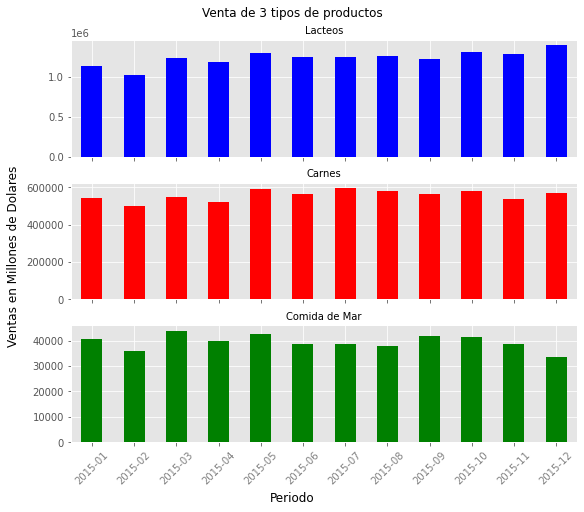

In [0]:
# Convertir el resultado a un DataFrame de Pandas para graficar (también se puede usar el método unstack)
agrupacion_pandas = agrupacion.toPandas()
agrupacion_pandas = agrupacion_pandas.pivot(index='fecha', columns='family', values='sum(sales)')

# Graficar en Pandas - Gráfico de barras para cada categoría de producto (DAIRY, MEATS, SEAFOOD)
plt.style.use('ggplot')

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, constrained_layout=True)
fig.set_size_inches(8, 7)
fig.suptitle('Venta de 3 tipos de productos')
fig.supylabel('Ventas en Millones de Dolares')
fig.supxlabel('Periodo')

# Graficar las ventas de cada categoría
agrupacion_pandas['DAIRY'].plot.bar(ax=ax1, color='blue')
agrupacion_pandas['MEATS'].plot.bar(ax=ax2, color='red')
agrupacion_pandas['SEAFOOD'].plot.bar(ax=ax3, color='green')

# Configurar las fuentes de los títulos
title_font = {'size': 10, 'name': 'Helvetica'}
ax1.set_title('Lacteos', fontdict=title_font)
ax2.set_title('Carnes', fontdict=title_font)
ax3.set_title('Comida de Mar', fontdict=title_font)

# Eliminar las etiquetas del eje x en algunos gráficos
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

# Configurar las etiquetas del eje x en el gráfico inferior
ax3.set_xticks(np.arange(0, len(agrupacion_pandas)))
ax3.set_xticklabels(agrupacion_pandas.index.values, rotation=45, fontdict={'color':  'grey', 'size': 10})

# Eliminar las leyendas de los gráficos
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

# Guardar la figura antes de mostrarla
plt.savefig('nivel_1.5_matplotlib.png', format='png')
plt.show()

Seaborn

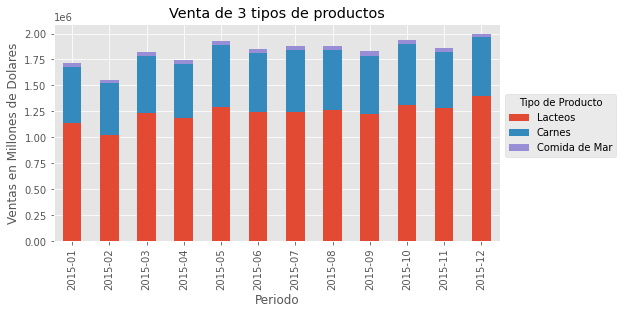

In [0]:
# Seaborn - Gráfico de barras apiladas
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# Graficar las ventas apiladas
agrupacion_pandas.plot.bar(
    ax=ax,
    stacked=True
)

# Títulos y etiquetas de los ejes
ax.set_title('Venta de 3 tipos de productos')
ax.set_ylabel('Ventas en Millones de Dolares')
ax.set_xlabel('Periodo')

# Configurar la leyenda del gráfico
ax.legend(
    title='Tipo de Producto',
    labels=['Lacteos', 'Carnes', 'Comida de Mar'],
    loc='upper left',
    bbox_to_anchor=(1, 0.7)
)

# Mostrar el gráfico
plt.show()
